In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Step 1: Load the dataset
df = pd.read_csv('seattle-weather.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


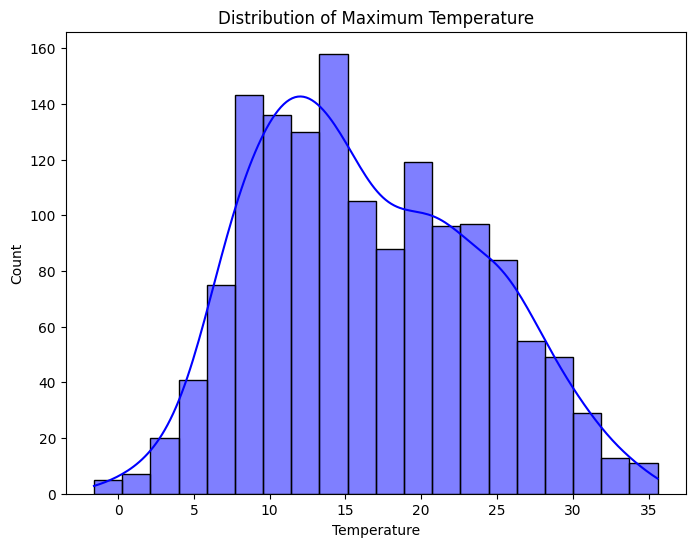

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram for 'temp_max'
plt.figure(figsize=(8, 6))
sns.histplot(df['temp_max'], bins=20, kde=True, color='blue')
plt.title('Distribution of Maximum Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()


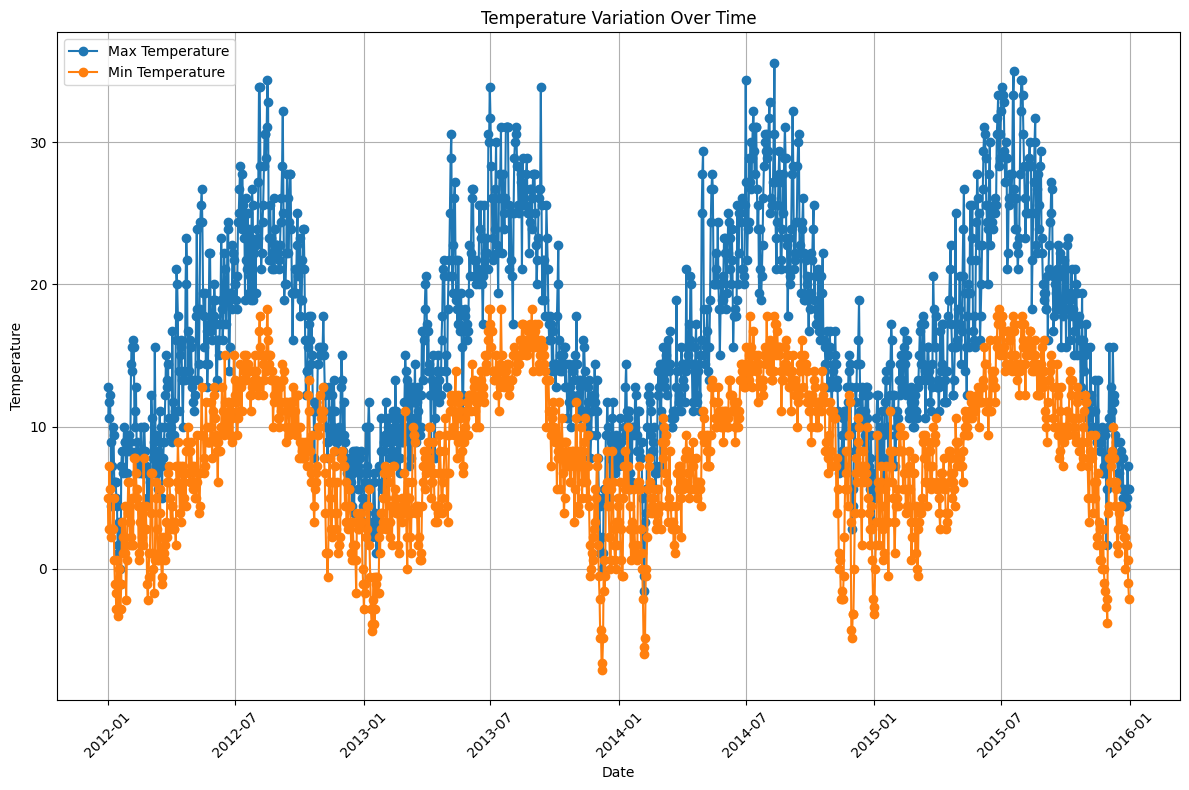

In [7]:
# Assuming 'date' column exists and is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort data by date if not already sorted
df = df.sort_values(by='date')

# Plotting temp_max and temp_min over time
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['temp_max'], label='Max Temperature', marker='o', linestyle='-')
plt.plot(df['date'], df['temp_min'], label='Min Temperature', marker='o', linestyle='-')

plt.title('Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
label_encoder = LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])

In [9]:
df = df.drop('date', axis=1)  # Drop the 'date'

In [10]:
# Step 3: Split data into features (X) and target variable (y)
X = df[['temp_max', 'temp_min', 'precipitation', 'wind']]  # Features
y = df['weather']  # Target variable

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Optionally, print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.8225255972696246
              precision    recall  f1-score   support

           0       0.17      0.11      0.13         9
           1       0.75      0.12      0.21        25
           2       0.93      0.92      0.92       120
           3       0.50      0.25      0.33         8
           4       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.63      0.47      0.49       293
weighted avg       0.81      0.82      0.79       293



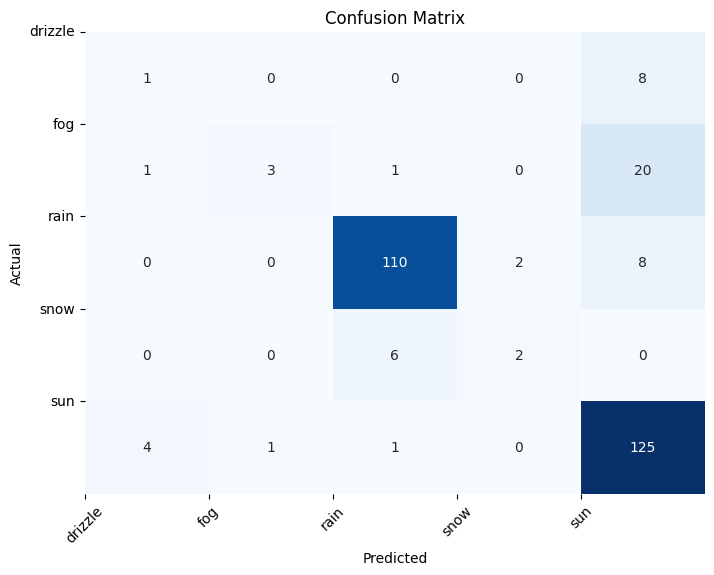

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=0)
plt.show()


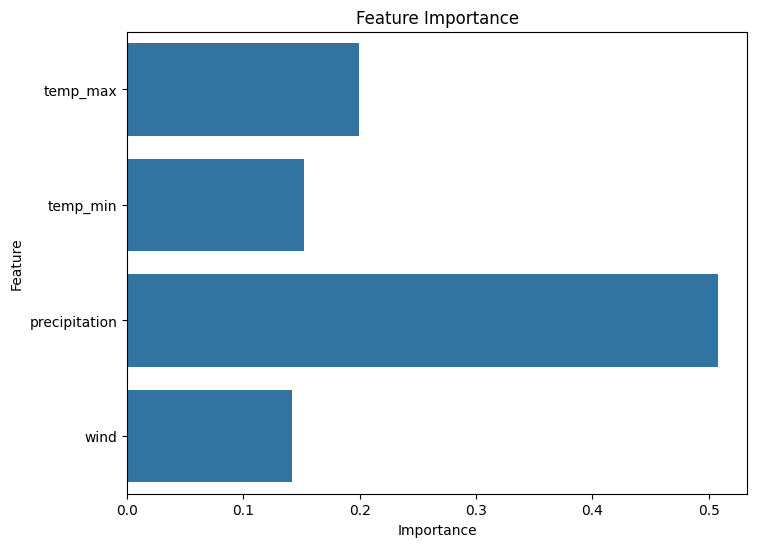

In [12]:
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [13]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'weather.pkl')

['weather.pkl']

In [14]:
# Calculate sizes of train and test sets
train_size = len(X_train) / len(df)
test_size = len(X_test) / len(df)

print("Train Set Size:", train_size)
print("Test Set Size:", test_size)

Train Set Size: 0.7994524298425736
Test Set Size: 0.2005475701574264


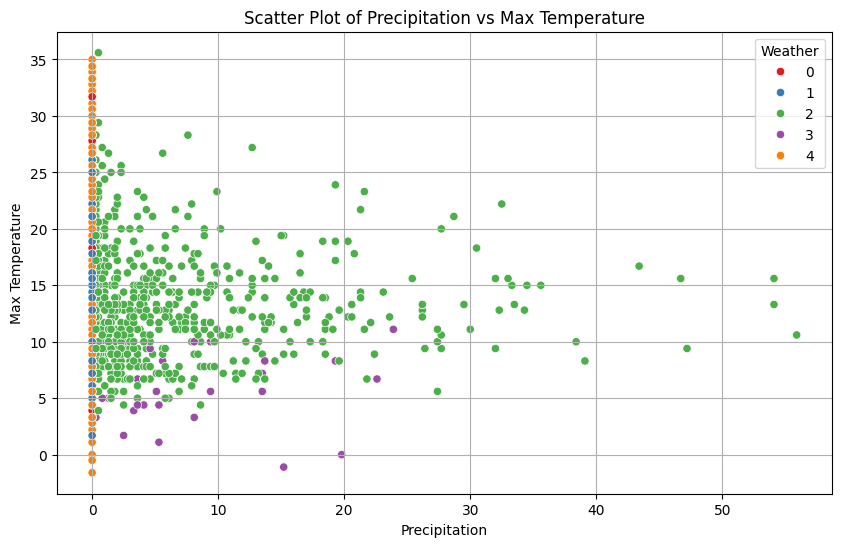

In [ ]:
# Example scatter plot for 'precipitation' vs 'temp_max'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precipitation', y='temp_max', data=df, hue='weather', palette='Set1')
plt.title('Scatter Plot of Precipitation vs Max Temperature')
plt.xlabel('Precipitation')
plt.ylabel('Max Temperature')
plt.legend(title='Weather')
plt.grid(True)
plt.show()


In [15]:
print(df.describe())

# Display the min and max values for each feature
print("\nMin values:\n", df.min())
print("\nMax values:\n", df.max())

       precipitation     temp_max     temp_min         wind      weather
count    1461.000000  1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136     2.752225
std         6.680194     7.349758     5.023004     1.437825     1.191380
min         0.000000    -1.600000    -7.100000     0.400000     0.000000
25%         0.000000    10.600000     4.400000     2.200000     2.000000
50%         0.000000    15.600000     8.300000     3.000000     2.000000
75%         2.800000    22.200000    12.200000     4.000000     4.000000
max        55.900000    35.600000    18.300000     9.500000     4.000000

Min values:
 precipitation    0.0
temp_max        -1.6
temp_min        -7.1
wind             0.4
weather          0.0
dtype: float64

Max values:
 precipitation    55.9
temp_max         35.6
temp_min         18.3
wind              9.5
weather           4.0
dtype: float64
